# Project E8: KAGGLE - TWO PATHS TO PREDICTING SUCCESS

Project for IDS course 2025. By Nele-Liis Võhma and Marek Kalda.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

!pip install xgboost

from xgboost import XGBRegressor

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.3/72.0 MB 7.6 MB/s eta 0:00:10
   -- ------------------------------------- 3.7/72.0 MB 9.9 MB/s eta 0:00:07
   ---- ----------------------------------- 7.9/72.0 MB 13.7 MB/s eta 0:00:05
   ------- -------------------------------- 13.9/72.0 MB 18.0 MB/s eta 0:00:04
   ------------ --------------------------- 22.0/72.0 MB 22.4 MB/s eta 0:00:03
   -------------- ------------------------- 26.0/72.0 MB 21.9 MB/s eta 0:00:03
   ----------------- ---------------------- 32.0/72.0 MB 22.9 MB/s eta 0:00:02
   -------------------- ------------------- 36.7/72.0 MB 23.5 MB/s eta 0:00:02
   ----------------------- ---------------- 41.4/72.0 MB 23.1 MB/s eta 0:00:02
   ------------------------- -------------- 46.1/72.0 MB 23.0 MB/s eta 0:00:02
   --------------------------- ------------ 49.3/72.0 MB 22.2 MB/s eta 0:00:02
   ---------------------------- ----------- 52.2/72.0 MB 21.7 MB/s

## 1. Exploring the dataset

In [2]:
data = pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
data.shape

(6607, 20)

In [5]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Final label exploration

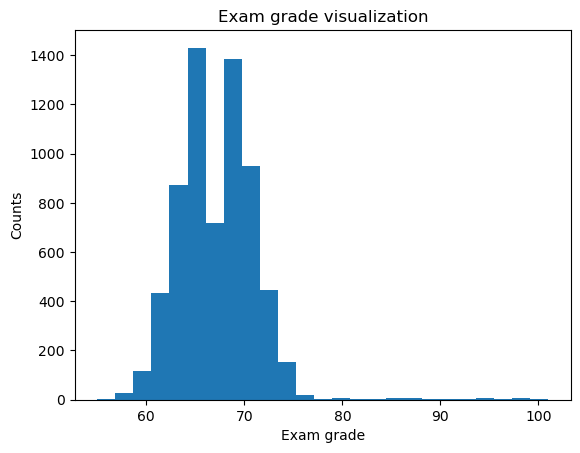

In [7]:
data["Exam_Score"].plot(
    kind="hist",
    bins=25
)

plt.title("Exam grade visualization")
plt.xlabel("Exam grade")
plt.ylabel("Counts")
plt.show()

In [8]:
print("Grade range:", data["Exam_Score"].min(), "-", data["Exam_Score"].max())
print("Missing values count:", data["Exam_Score"].isna().sum())

Grade range: 55 - 101
Missing values count: 0


In [9]:
data[data["Exam_Score"] == 101] ## Everything other than the exam score seems normal

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [10]:
data.loc[data["Exam_Score"] == 101, "Exam_Score"] = 100

In [11]:
print("Max grade after changes:", data["Exam_Score"].max())

Max grade after changes: 100


### Missing values per each column

In [12]:
data.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [13]:
data = data.dropna()

In [14]:
data.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [15]:
data.shape

(6378, 20)

In [16]:
data.drop_duplicates()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [17]:
#for col in data.columns: # Check for any outliers and spelling errors
#    print(f"Column {col}")
#    print(data[col].value_counts(dropna=False))
#    print("-"*40)
    

In [18]:
# Correlation matrix
corr = data.corr(numeric_only=True)

# Focus on correlation with final_grade
print(corr['Exam_Score'].sort_values(ascending=False))

Exam_Score           1.000000
Attendance           0.580394
Hours_Studied        0.445209
Previous_Scores      0.174292
Tutoring_Sessions    0.156769
Physical_Activity    0.025155
Sleep_Hours         -0.017149
Name: Exam_Score, dtype: float64


In [19]:
data_dummies_eval = pd.get_dummies(data) # Needs to be used
corr_values = data_dummies_eval.corr()['Exam_Score'].sort_values(ascending=False)

# Filter only values greater than 0.02
filtered_corr = corr_values[abs(corr_values) < 0.02]

print(filtered_corr)

Parental_Education_Level_College    0.017985
School_Type_Private                 0.010898
Gender_Female                       0.004887
Gender_Male                        -0.004887
Peer_Influence_Neutral             -0.007443
School_Type_Public                 -0.010898
Sleep_Hours                        -0.017149
Name: Exam_Score, dtype: float64


## 3. Training regression model

### Methods for the process

#### Finding dummies

In [20]:
def get_dummies(data):
    data_dummies = pd.get_dummies(data, drop_first=True) 
    
    X = data_dummies.drop(columns=["Exam_Score"])
    y = data_dummies["Exam_Score"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
    
    scaler = StandardScaler() ## Doesnt work yet
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

#### MSE and RMSE

In [21]:
def MSE(y_target, y_pred):
    return np.mean((y_target - y_pred)**2)

def RMSE(y_target, y_pred):
    return np.sqrt(MSE(y_target, y_pred))

#### Finding best alpha for Lasso and Ridge models using cross validation.

In [22]:
def get_best_alpha(model,X,y,alphas): ### Find best alpha for Ridge and Lasso using cross-val
    kf = KFold(n_splits=3, random_state = 0, shuffle=True)
    results = []
    for alpha in alphas:
        model.set_params(alpha=alpha)
        for train_indexes, val_indexes in kf.split(X):
            X_train, X_val = X.values[train_indexes], X.values[val_indexes]
            y_train, y_val = y.values[train_indexes], y.values[val_indexes]

            model.fit(X_train, y_train)
            rmse = RMSE(y_val,model.predict(X_val))
            results.append((alpha, rmse))
   

    best_alpha, rmse = sorted(results, key=lambda x: x[1])[0]
    return best_alpha, rmse

#### Hyperparameter tuning for Random Forest Regressor

#### Method that trains all of the models

In [118]:
def run_models(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_s = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_s = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    ridge_alpha, _ = get_best_alpha(Ridge(), X_train, y_train, np.linspace(0.01, 10, 50))
    lasso_alpha, _ = get_best_alpha(Lasso(), X_train, y_train, np.linspace(0.001, 1, 50))

    #rf_best_model= get_best_random_forest(X_train, y_train) ### If hyperparameter tuning is wanted
    
    models = {
        "Linear": LinearRegression().fit(X_train_s, y_train),
        "Ridge": Ridge(alpha=ridge_alpha).fit(X_train_s, y_train),
        "Lasso": Lasso(alpha=lasso_alpha).fit(X_train_s, y_train),
        # "RandomForest": RandomForestRegressor(random_state=5) #rf_best_model, ### for hyperparameter tuning
    }

    results = []
    
    for name, model in models.items():
        y_train_pred = model.predict(X_train_s)
        y_test_pred = model.predict(X_test_s)

        results.append({
            "Model": name,
            "y_train_pred": y_train_pred,
            "y_test_pred": y_test_pred
        })

    return models, results


In [121]:
def run_models(X_train, X_test, y_train, y_test, model_dict, cv=3):
    models = {}
    results = []

    for name, model in model_dict.items():

        # Cross validation
        cv_rmse_scores = -cross_val_score(
            model,
            X_train,
            y_train,
            cv=cv,
            scoring="neg_root_mean_squared_error",
            n_jobs=-1
        )

        cv_rmse = cv_rmse_scores.mean()

        #Fit the model
        model.fit(X_train, y_train)
        models[name] = model

        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        results.append({
            "Model": name,
            "CV_RMSE": cv_rmse,
            "y_train_pred": y_train_pred,
            "y_test_pred": y_test_pred
        })

    return models, results


#### Finds RMSE and R2 scores for all the models using results from the previous method

In [94]:
def find_scores(y_train, y_test, results):

    scores = []
    for res in results:
        model_name = res["Model"]
        y_train_pred = res["y_train_pred"]
        y_test_pred = res["y_test_pred"]
        
        train_rmse = RMSE(y_train, y_train_pred)
        test_rmse = RMSE(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        scores.append({
                "Model": model_name,
                "Train RMSE": round(train_rmse, 5),
                "CV RMSE": round(res["CV_RMSE"], 5),
                "Test RMSE": round(test_rmse, 5),
                "Train R2": round(train_r2, 5),
                "Test R2": round(test_r2, 5)
            })
    
    scores_df = pd.DataFrame(scores)
    print(scores_df)
    return scores

#### Plots predicted vs actual data

In [26]:
def analysis(y_true, y_pred, data_type, model_name="Model"):

    # Predicted vs Actual    
    plt.scatter(y_pred, y_true, alpha=0.7)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             'r--')  # diagonal line
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} : Predicted vs Actual")
    
    plt.show()

#### Initial test

In [147]:
X_train, X_test, y_train, y_test = get_dummies(data)

scaler = StandardScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_s = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

ridge_alpha, _ = get_best_alpha(Ridge(), X_train, y_train, np.linspace(0.01, 10, 50))
lasso_alpha, _ = get_best_alpha(Lasso(), X_train, y_train, np.linspace(0.001, 1, 50))

print("Ridge best alpha:", ridge_alpha)
print("Lasso best alpha:", lasso_alpha)

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=ridge_alpha),
    "Lasso": Lasso(alpha=lasso_alpha),
}

result_models, results = run_models(X_train_s, X_test_s, y_train, y_test, models, 3)

Ridge best alpha: 6.737959183673469
Lasso best alpha: 0.001


In [146]:
scores = find_scores(y_train, y_test, results)

    Model  Train RMSE  CV RMSE  Test RMSE  Train R2  Test R2
0  Linear     2.05784  2.05126    2.08933   0.72275  0.71711
1   Ridge     2.05785  2.05123    2.08948   0.72275  0.71707
2   Lasso     2.05786  2.05118    2.08951   0.72274  0.71706


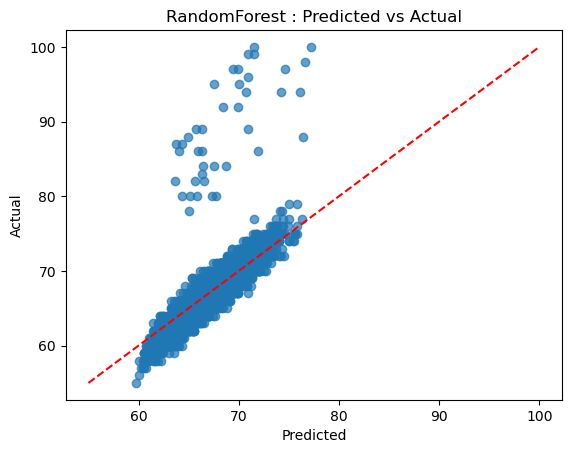

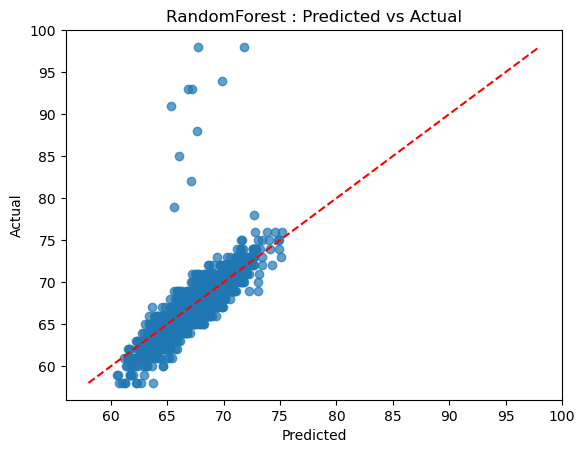

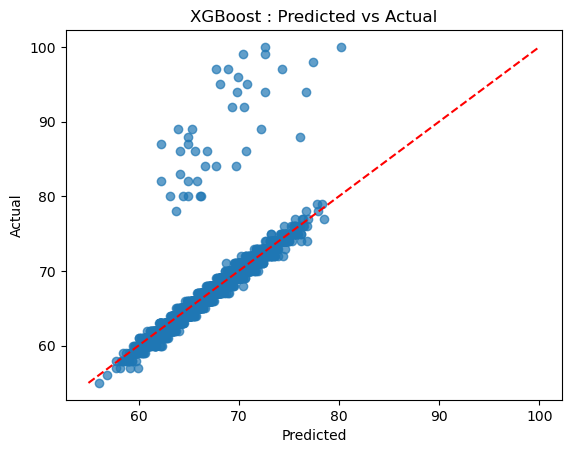

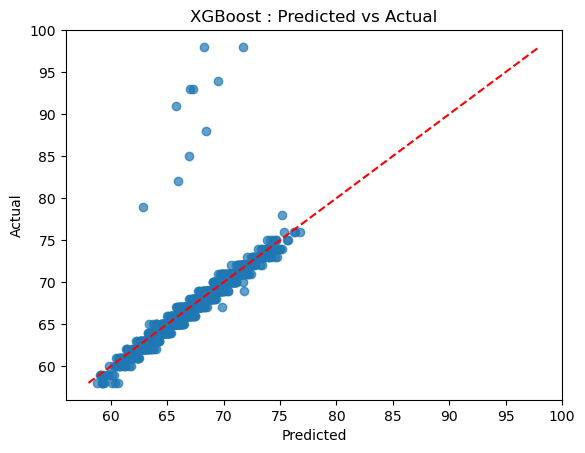

In [193]:
for res in results:
    analysis(y_train, res["y_train_pred"], "train", res["Model"])
    analysis(y_test, res["y_test_pred"], "test", res["Model"])

Since our Exam_Score is right skewed (most of the values are in the range of 60-75), it seems that our models start underpredicting, meaning that it only predicts in that 60-75 range. Cases where the real exam score is over 75 don't seem to be predictable

#### Checking feature importance

In [148]:
coeffs = pd.Series(result_models["Linear"].coef_, index=X_train.columns).sort_values(ascending=False)

print(coeffs)

Attendance                               2.294711
Hours_Studied                            1.751331
Previous_Scores                          0.700774
Tutoring_Sessions                        0.628750
Peer_Influence_Positive                  0.505743
Distance_from_Home_Near                  0.430654
Extracurricular_Activities_Yes           0.298541
Peer_Influence_Neutral                   0.262262
Internet_Access_Yes                      0.240348
Physical_Activity                        0.185357
Parental_Education_Level_Postgraduate    0.183237
Distance_from_Home_Moderate              0.156270
School_Type_Public                       0.003767
Gender_Male                             -0.013233
Sleep_Hours                             -0.039787
Parental_Education_Level_High School    -0.222007
Learning_Disabilities_Yes               -0.244315
Teacher_Quality_Medium                  -0.265091
Motivation_Level_Medium                 -0.274492
Family_Income_Medium                    -0.281650


In [149]:
coeffs = pd.Series(result_models["Ridge"].coef_, index=X_train.columns).sort_values(ascending=False)

print(coeffs)

Attendance                               2.291649
Hours_Studied                            1.748958
Previous_Scores                          0.699783
Tutoring_Sessions                        0.627920
Peer_Influence_Positive                  0.504190
Distance_from_Home_Near                  0.428610
Extracurricular_Activities_Yes           0.298156
Peer_Influence_Neutral                   0.260944
Internet_Access_Yes                      0.239968
Physical_Activity                        0.184884
Parental_Education_Level_Postgraduate    0.183174
Distance_from_Home_Moderate              0.154434
School_Type_Public                       0.003654
Gender_Male                             -0.013184
Sleep_Hours                             -0.039829
Parental_Education_Level_High School    -0.221731
Learning_Disabilities_Yes               -0.244072
Teacher_Quality_Medium                  -0.264528
Motivation_Level_Medium                 -0.272936
Family_Income_Medium                    -0.280068


In [150]:
coeffs = pd.Series(result_models["Lasso"].coef_, index=X_train.columns).sort_values(ascending=False)

print(coeffs)

Attendance                               2.293727
Hours_Studied                            1.750213
Previous_Scores                          0.699730
Tutoring_Sessions                        0.627788
Peer_Influence_Positive                  0.502786
Distance_from_Home_Near                  0.425521
Extracurricular_Activities_Yes           0.297577
Peer_Influence_Neutral                   0.259175
Internet_Access_Yes                      0.239242
Physical_Activity                        0.183977
Parental_Education_Level_Postgraduate    0.182543
Distance_from_Home_Moderate              0.151172
School_Type_Public                       0.002729
Gender_Male                             -0.012137
Sleep_Hours                             -0.038879
Parental_Education_Level_High School    -0.221283
Learning_Disabilities_Yes               -0.243266
Teacher_Quality_Medium                  -0.263484
Motivation_Level_Medium                 -0.271411
Family_Income_Medium                    -0.278497


After scaling all of the data before running the models, the coefficents of all the models are very similar.

#### Test with some feature engineering

In [165]:
data_less_features = data.drop(columns=["Gender", "Sleep_Hours", "School_Type"])
X_train2, X_test2, y_train2, y_test2 = get_dummies(data_less_features)

scaler = StandardScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train2), columns=X_train2.columns)
X_test_s = pd.DataFrame(scaler.transform(X_test2), columns=X_test2.columns)

ridge_alpha, _ = get_best_alpha(Ridge(), X_train_s, y_train, np.linspace(0.01, 10, 50))
lasso_alpha, _ = get_best_alpha(Lasso(), X_train_s, y_train, np.linspace(0.001, 1, 50))

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=ridge_alpha),
    "Lasso": Lasso(alpha=lasso_alpha),
}

result_models2, results2 = run_models(X_train_s, X_test_s, y_train, y_test, models, 3)

In [166]:
scores = find_scores(y_train2, y_test2, results2)

    Model  Train RMSE  CV RMSE  Test RMSE  Train R2  Test R2
0  Linear     2.05827  2.04950    2.08662   0.72263  0.71785
1   Ridge     2.05827  2.04950    2.08662   0.72263  0.71785
2   Lasso     2.05828  2.04949    2.08683   0.72263  0.71779


In [ ]:
for res in results2:
    analysis(y_train2, res["y_train_pred"], "train", res["Model"])
    analysis(y_test2, res["y_test_pred"], "test", res["Model"])

After removing some of the features with low coefficents, every models Test RMSE was lovered by 0.003

#### Plot for the poster

In [ ]:
### For the poster

y_true = y_test
y_pred = results[2]["y_test_pred"]

df = pd.DataFrame({
    "Predicted": y_pred,
    "Actual": y_true
})

plt.figure(figsize=(6,6))

sns.scatterplot(data=df, x="Predicted", y="Actual", color="green", alpha=0.7)

plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         color="black", linestyle="--")

# Labels and title
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.title("Lasso : Predicted vs Actual", fontsize=18)

plt.savefig("Lasso_Pred_Actual.pdf")
plt.show()

### Testing RandomForestRegressor and XGBoost

#### Hyperparameter tuning for RFR and XGB

In [55]:
def get_best_xgboost(X, y):
    from sklearn.model_selection import GridSearchCV
    
    params = {
        "n_estimators": [200, 400],
        "learning_rate": [0.03, 0.05],
        "max_depth": [3, 4],
        "min_child_weight": [4, 6, 8],
        "subsample": [0.7, 0.9],
        "colsample_bytree": [0.5, 0.8],
        "reg_lambda": [1, 5, 10],
        "gamma": [0, 1, 3]
    }

    xgb = XGBRegressor(
        objective="reg:squarederror",
        random_state=5,
        n_jobs=-1
    )

    grid = GridSearchCV(
        estimator=xgb,
        param_grid=params,
        cv=3,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1,
        verbose=0
    )

    grid.fit(X, y)

    print("Best XGBoost params:", grid.best_params_)

    return grid.best_estimator_

In [56]:
def get_best_random_forest(X, y): ### Hyper-Parameter tuning for Random Forest Regressor
    param_grid = {
        "n_estimators": [150, 250],
    "max_depth": [3, 5, 7],
    "min_samples_split": [4, 6, 10],
    "min_samples_leaf": [2, 4, 6],
    "max_features": ["sqrt", 0.5],
    }

    rf = RandomForestRegressor(random_state=5)

    grid = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=3,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )

    grid.fit(X, y)
    
    print("Best RandomForest params: ", grid.best_params_)

    return grid.best_estimator_

#### Initial models

In [167]:
X_train, X_test, y_train, y_test = get_dummies(data)

#normal_rf = RandomForestRegressor(random_state=5)
#normal_xgb = XGBRegressor(objective="reg:squarederror",random_state=5,n_jobs=-1)

best_rf = get_best_random_forest(X_train, y_train)
best_xgb = get_best_xgboost(X_train, y_train)

models = {
    "RandomForest": best_rf,
    "XGBoost": best_xgb
}

result_models, results = run_models(X_train, X_test, y_train, y_test, models, 3)

Best RandomForest params:  {'max_depth': 7, 'max_features': 0.5, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 250}
Best XGBoost params: {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 400, 'reg_lambda': 5, 'subsample': 0.7}


In [168]:
scores = find_scores(y_train, y_test, results)

          Model  Train RMSE  CV RMSE  Test RMSE  Train R2  Test R2
0  RandomForest     2.24456  2.47186    2.51860   0.67015  0.58893
1       XGBoost     1.92748  2.11706    2.15585   0.75676  0.69881


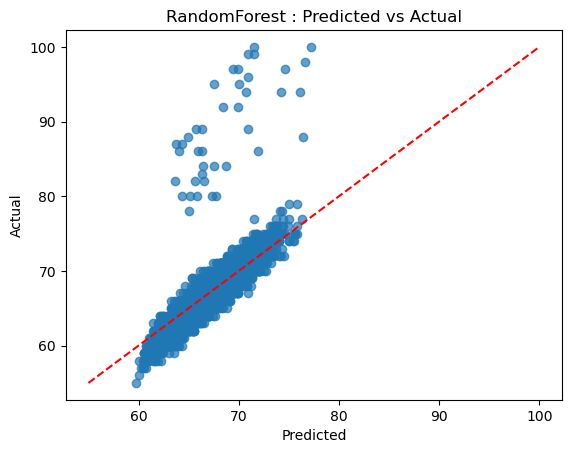

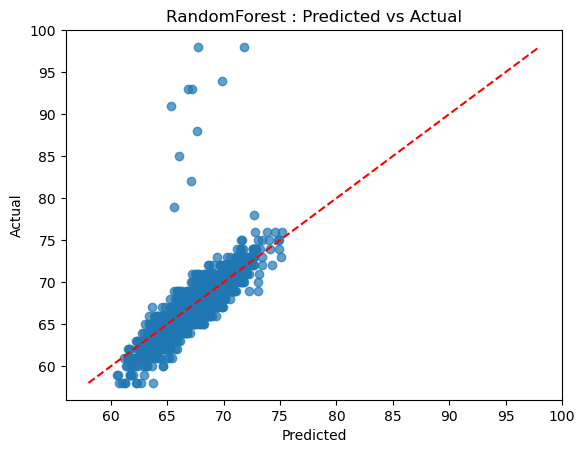

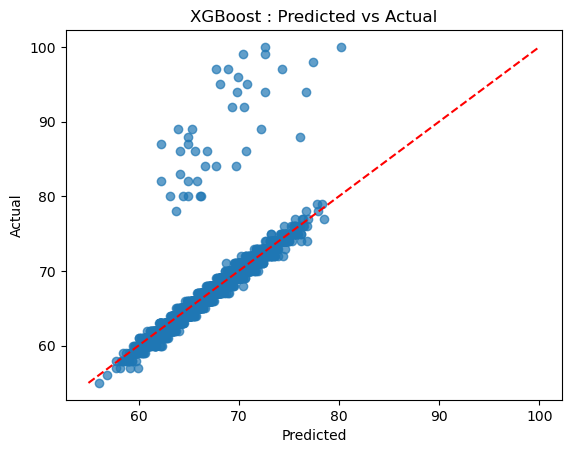

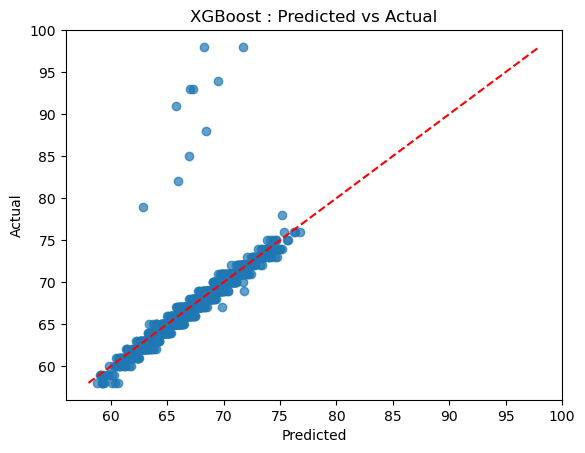

In [194]:
for res in results:
    analysis(y_train, res["y_train_pred"], "train", res["Model"])
    analysis(y_test, res["y_test_pred"], "test", res["Model"])

#### Checking for feature importances

In [173]:
importances = pd.Series(result_models["RandomForest"].feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(importances)

Attendance                               0.531554
Hours_Studied                            0.300313
Previous_Scores                          0.055522
Tutoring_Sessions                        0.023710
Access_to_Resources_Low                  0.017741
Parental_Involvement_Low                 0.013536
Sleep_Hours                              0.005912
Physical_Activity                        0.005531
Peer_Influence_Positive                  0.005072
Parental_Education_Level_High School     0.004519
Family_Income_Low                        0.003861
Motivation_Level_Low                     0.003755
Distance_from_Home_Near                  0.003302
Access_to_Resources_Medium               0.003285
Extracurricular_Activities_Yes           0.002916
Teacher_Quality_Medium                   0.002762
Parental_Involvement_Medium              0.002715
Parental_Education_Level_Postgraduate    0.002561
Learning_Disabilities_Yes                0.002380
School_Type_Public                       0.001535


#### RFR AND XGB with less features

In [189]:
data_less_features = data.drop(columns=["Gender", "Sleep_Hours", "School_Type"])
X_train2, X_test2, y_train2, y_test2 = get_dummies(data_less_features)

#normal_rf = RandomForestRegressor(random_state=5)
#normal_xgb = XGBRegressor(objective="reg:squarederror",random_state=5,n_jobs=-1)

best_rf = get_best_random_forest(X_train2, y_train2)
best_xgb = get_best_xgboost(X_train2, y_train2)

models = {
    "RandomForest": best_rf,
    "XGBoost": best_xgb
}

result_models, results = run_models(X_train2, X_test2, y_train2, y_test2, models, 3)

Best RandomForest params:  {'max_depth': 7, 'max_features': 0.5, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 250}
Best XGBoost params: {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 400, 'reg_lambda': 10, 'subsample': 0.7}


In [190]:
scores = find_scores(y_train, y_test, results)

          Model  Train RMSE  CV RMSE  Test RMSE  Train R2  Test R2
0  RandomForest     2.24441  2.46310     2.5225   0.67020  0.58765
1       XGBoost     1.94079  2.12091     2.1487   0.75339  0.70081


In [191]:
print(len(data.columns))

20


In [192]:
print(len(data_less_features.columns))

17


After some feature engineering i could lover the test RMSE for XGBoost 0.007, but test RMSE for Random Forest went up by 0.004